In [ ]:
from mask_grid_lines import mask_grid_lines

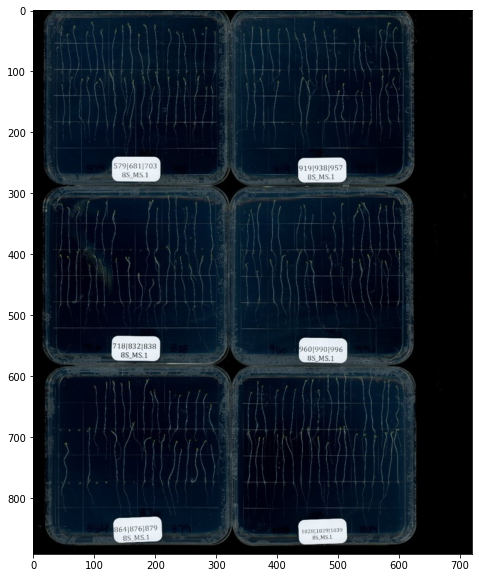

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('/content/1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(image)

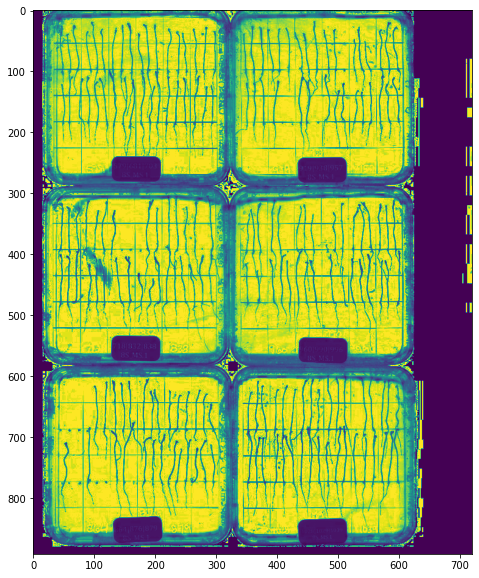

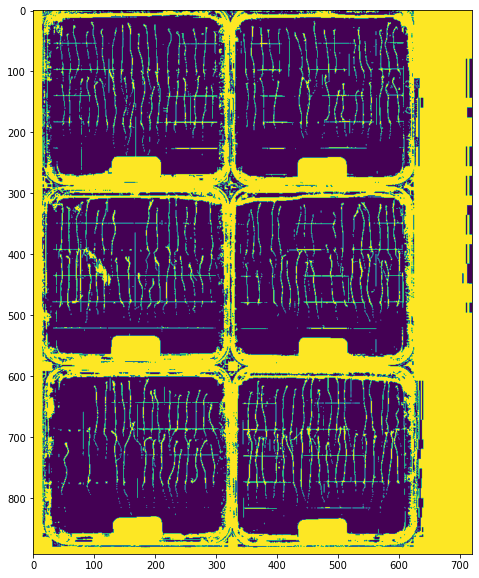

In [ ]:
# converting the image from rgb to hsv
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.figure(figsize=(20, 10))
plt.imshow(image_hsv[:, :, 1])
plt.show()
# applying binary threshold to extract the patches (https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)
# ret is the threshold that was used and image_result is the resultant image
ret, image_result = cv2.threshold(image_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.figure(figsize=(20, 10))
plt.imshow(image_result)

12
8


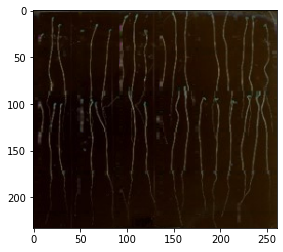

9
6


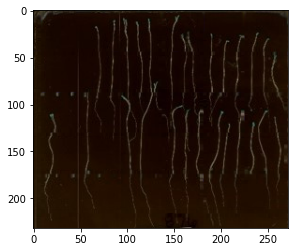

10
8


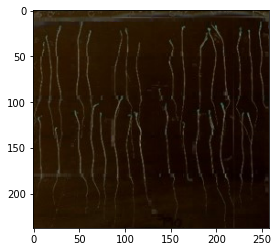

8
8


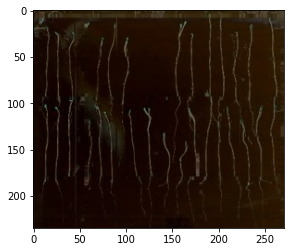

8
6


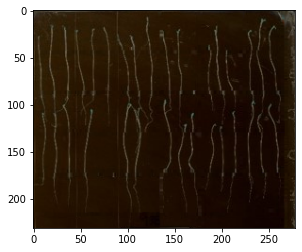

10
10


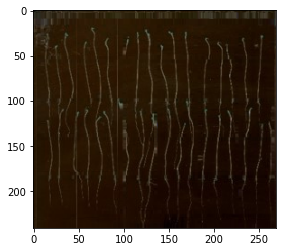

In [ ]:
# blurring the image to a single channel to apply better thresholding
blur = cv2.medianBlur(image_hsv[:, :, 1], 9)
# Binary thresholding the single channel image
ret, image_result_original = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plt.imshow(image_result_original)
# plt.show()

# now we are finding the big rectangles in the image. For that we need a kernel
# Defining the size and type of the structural element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
# Performing morphological opening to remove noise (applying "open" operation (remeber Shivani showed us the link?) to
# remove noise)
image_result_original = cv2.morphologyEx(image_result_original, cv2.MORPH_OPEN, kernel, )
# Finding contours in the binary image
contours = cv2.findContours(image_result_original, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
# print(len(contours))

image_copy_original = image.copy()

#  making a list for region of interest
ROI=[]

#Traversing through the contours
for c in contours:
    #Filtering contours by area 
    if(cv2.contourArea(c) > 500) and (cv2.contourArea(c) < 190000):
        #Finding 4-sided plates in the picture to process each separately
        approx = cv2.approxPolyDP(c, 0.09 * cv2.arcLength(c, True), True) 
        if(len(approx) == 4):  
            # For each square part of the image, we perform the following
            y, x, h, w = cv2.boundingRect(c)
            #Extract the square region from the full image
            ROI=image[x:x+w, y:y+h]
            # cv2.imwrite('test.png',ROI)
            coordinates=[(x, y),(x+w, y+h)]
            # masking the grid lines
            masked_image=np.array(mask_grid_lines(image, coordinates))
            # finding the shape of image and cropping the corners to remove the outline of the boxes.
            new_w, new_h = np.array(masked_image)[:, :, 1].shape
            # cropping from the borders of the image
            output = masked_image[0:new_w, 15:new_h-15]
            image_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
            plt.imshow(image_rgb)
            plt.show()
            # cv2.imwrite('box.jpg',image_rgb)
            # break
            

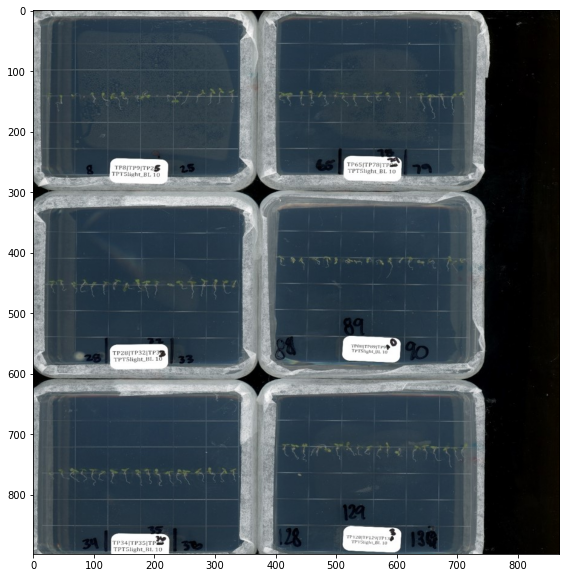

In [ ]:
image=cv2.imread('/content/2.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(image)

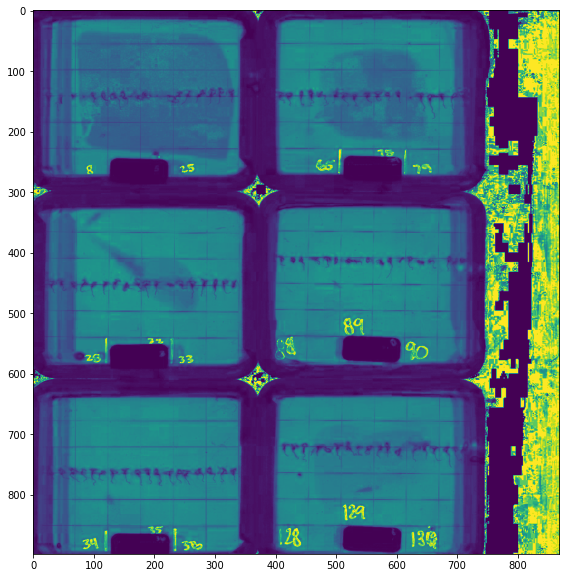

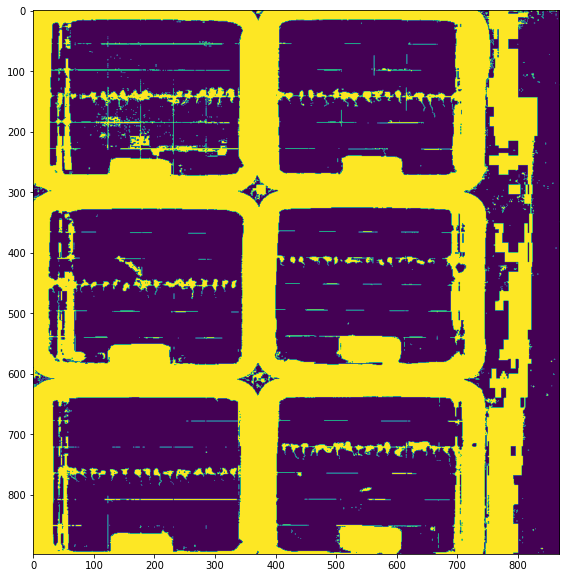

In [ ]:
# converting the image from rgb to hsv
image_hsv=cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
plt.figure(figsize=(20,10))
plt.imshow(image_hsv[:,:,1])
plt.show()
# applying binary threshold to extract the patches (https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)
# ret is the threshold that was used and image_result is the resultant image
ret, image_result = cv2.threshold(image_hsv[:,:,1],0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.figure(figsize=(20,10))
plt.imshow(image_result)

6
5


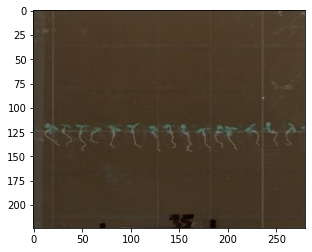

4
9


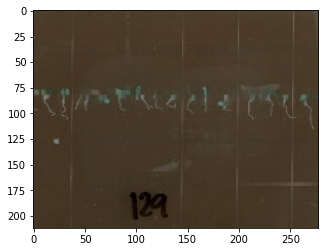

5
9


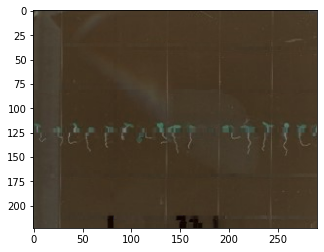

4
7


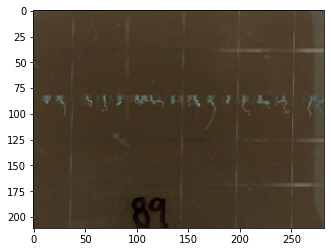

4
9


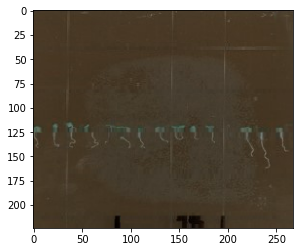

4
7


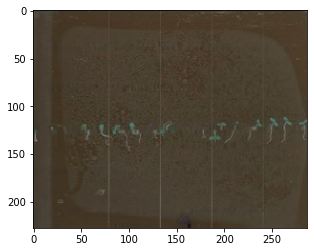

In [ ]:
# blurring the image to a single channel to apply better thresholding
blur=cv2.medianBlur(image_hsv[:,:, 1],9)
# Binary thresholding the single channel image
ret,image_result_original = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plt.imshow(image_result_original)
# plt.show()

# now we are finding the big rectangles in the image. For that we need a kernel
# Defining the size and type of the structural element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
# Performing morphological opening to remove noise (applying "open" operation (remeber Shivani showed us the link?) to
# remove noise)
image_result_original = cv2.morphologyEx(image_result_original, cv2.MORPH_OPEN, kernel, )
# Finding contours in the binary image
contours= cv2.findContours(image_result_original, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
# print(len(contours))
image_copy_original=image.copy()
#  making a list for region of interest
ROI=[]

#Traversing through the contours
for c in contours:
    #Filtering contours by area 
    if(cv2.contourArea(c)>500) and (cv2.contourArea(c)< 190000):
        #Finding 4-sided plates in the picture to process each separately
        approx = cv2.approxPolyDP(c, 0.09 * cv2.arcLength(c, True), True) 
        if(len(approx)==4):  
            # For each square part of the image, we perform the following
            x,y,w,h = cv2.boundingRect(c)
            #Extract the square region from the full image
            ROI=image[y:y+h,x:x+w]
            # cv2.imwrite('test.png',ROI)
            coordinates=[(y,x),(y+h,x+w)]
            # masking the grid lines
            masked_image=np.array(mask_grid_lines(image,coordinates))
            # finding the shape of image and cropping the corners to remove the outline of the boxes.
            new_h,new_w = np.array(masked_image)[:,:,1].shape
            # cropping from the borders of the image
            output = masked_image[0:new_h, 15:new_w-15]
            image_rgb=cv2.cvtColor(output,cv2.COLOR_BGR2RGB)
            plt.imshow(image_rgb)
            plt.show()
            # cv2.imwrite('box.jpg',image_rgb)
            # break
            